# 1. Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize
%matplotlib inline

In [2]:
def plotData():

    pos = np.array([list(X[i]) for i in range(len(Y)) if Y[i][0] == 1])
    neg = np.array([list(X[i]) for i in range(len(Y)) if Y[i][0] == 0])
    
    plt.figure(figsize=(10,7))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label='Admitted') # black plus
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label='Not admitted') # yellow circle
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend() # Admitted or Not admitted
    plt.grid(True)


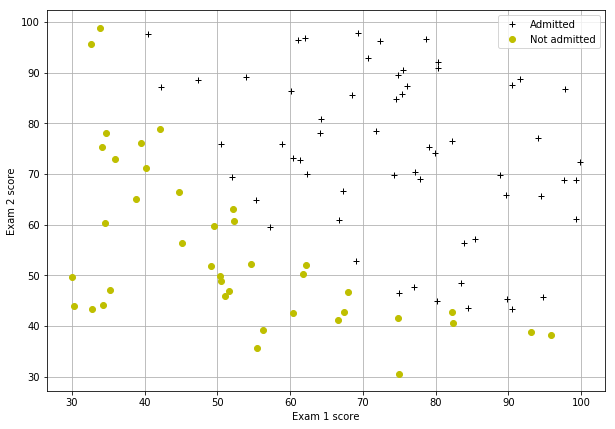

In [3]:
LEARNING_RATE = 0.001
NUM_STEPS = 100000

data = np.loadtxt('./ex2/ex2data1.txt', delimiter=',')
X = data[:, :-1] # 100 x 2
Y = np.reshape(data[:, -1], [-1, 1]) # 100 x 1

m = len(Y)
n = len(X[0])

#W = np.reshape(np.zeros(2), [-1, 1]) # 2 x 1
W = np.array([[0],[0]])
B = 0

plotData()

In [4]:
def sigmoid(z):
    return 1 / (1 + math.e ** -z)

def hypothesis(w, b):
    return sigmoid(np.matmul(X, w) + b) # (100, 2) * (2, 1) + (1) = (100, 1)

def computeCost(w, b):
    loss = -1/m * np.sum((Y * np.log(hypothesis(w, b)) + ((1 - Y) * np.log(1 - hypothesis(w, b)))))
    return loss

print("Initial Loss: "+str(computeCost(W, B)))

def gradientDescent(w, b):
    diff = np.transpose(hypothesis(w, b) - Y) # (1, 100)
    
    w_gradient = LEARNING_RATE * 1/m * np.matmul(diff, X) # matmul((1, 100), (100, 2)) => (1, 2)
    b_gradient = LEARNING_RATE * 1/m * np.sum(hypothesis(w, b) - Y)

    w = w - np.transpose(w_gradient) # (2, 1)
    b = b - b_gradient # 1
    
    return w, b

index  = 0
for i in range(0, NUM_STEPS):
    loss = computeCost(W, B)
    W, B = gradientDescent(W, B)
    index = index + 1

print("Final Loss: "+str(computeCost(W, B)))

Initial Loss: 0.6931471805599453
Final Loss: 0.38738952271118804


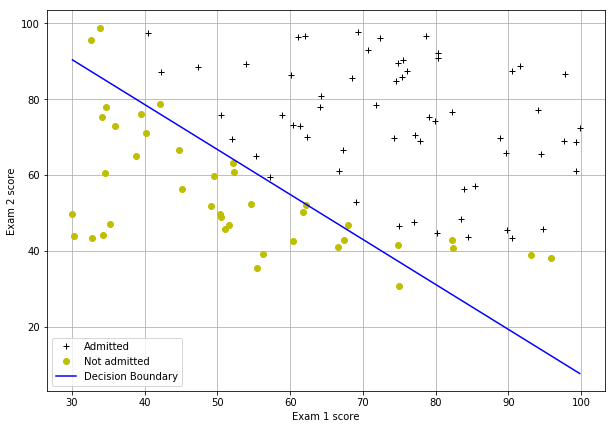

In [5]:
xs = np.array([np.min(X[:,0]), np.max(X[:,0])])
ys = (-1/W[1][0]) * (W[0][0] * xs + B) # x2 = -(w1 * x1 + b) / w2

plotData()
plt.plot(xs, ys,'b-',label='Decision Boundary')
plt.legend()

# 2. Regularized Logistic Regression

In [6]:
data = np.loadtxt('./ex2/ex2data2.txt', delimiter=',')
X = data[:, :-1] # 118 x 2
Y = np.reshape(data[:, -1], [-1, 1])

print(np.shape(Y))

def plotData():

    pos = np.array([list(X[i]) for i in range(len(Y)) if Y[i][0] == 1])
    neg = np.array([list(X[i]) for i in range(len(Y)) if Y[i][0] == 0])
    
    plt.figure(figsize=(10,7))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label='y = 1') # black plus
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label='y = 0') # yellow circle
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)


(118, 1)


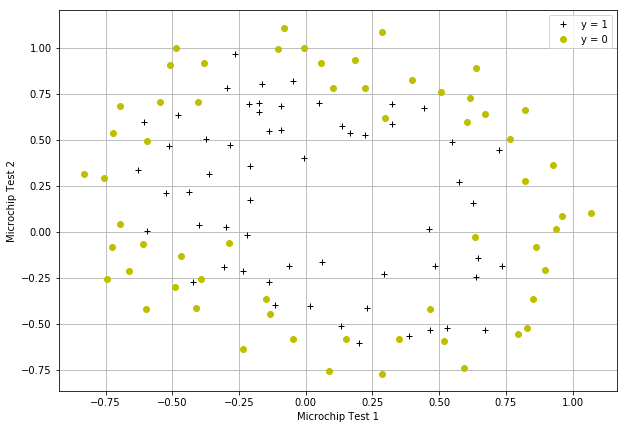

In [7]:
plotData()

In [8]:
def mapFeature(x1, x2):
    degree = 6
    output = []

    for i in range(1, degree+1):
        for j in range(0, i+1): # 1 => (0, 1), 2 => (0, 1, 2) ... 6 => (0, 1 ..., 6)
            temp1 = x1 ** (i-j)
            temp2 = x2 ** i
            temp = temp1*temp2 # (118, )
            output.append(temp)
    
    mapX = np.transpose(output) # (118, 27)
    return mapX

In [9]:
mapX = mapFeature(X[:, 0], X[:, 1]) # (118, 27)
mapY = np.reshape(data[:, -1], [-1, 1]) # (118, 1)
mapW = np.zeros([len(mapX[0]), 1]) # (27, 1)
mapB = np.zeros(([1,1])) # (1, 1)

m = len(mapX)
n = len(mapX[0])

LEARNING_RATE = 10
NUM_STEPS = 100000
LAMBDA = 0

In [10]:
def sigmoid(z):
    return 1 / (1 + math.e ** -z)

def hypothesis(w, b):
    return sigmoid(np.matmul(mapX, w) + b) # (118, 27) * (27, 1) + (1, 1) = (118, 1)

def computeCost(w, b):
    val_loss = -1/m * np.sum((mapY * np.log(hypothesis(w, b)) + ((1 - mapY) * np.log(1 - hypothesis(w, b)))))
    reg_loss = (LAMBDA/2*m) * np.sum(w**2)
    #print(val_loss)
    loss = val_loss + reg_loss
    return loss

def gradientDescent(w, b):
    diff = np.transpose(hypothesis(w, b) - mapY) # (1, 118)
    
    w_gradient = LEARNING_RATE * 1/m * np.matmul(diff, mapX) # matmul((1, 118), (118, 27)) => (1, 27)
    b_gradient = LEARNING_RATE * 1/m * np.sum(hypothesis(w, b) - mapY)

    w = w * (1 - (LEARNING_RATE * (LAMBDA / m))) - np.transpose(w_gradient) # (27, 1)
    b = b - b_gradient # (1, 1)
    
    return w, b

print("Initial Loss: "+str(computeCost(mapW, mapB)))

index  = 0
for i in range(0, NUM_STEPS):
    loss = computeCost(mapW, mapB)
    mapW, mapB = gradientDescent(mapW, mapB)
    index = index + 1

print("Final Loss: "+str(computeCost(mapW, mapB)))


Initial Loss: 0.6931471805599454
Final Loss: 0.36842431842678874


Text(0.5,1,'Decision Boundary')

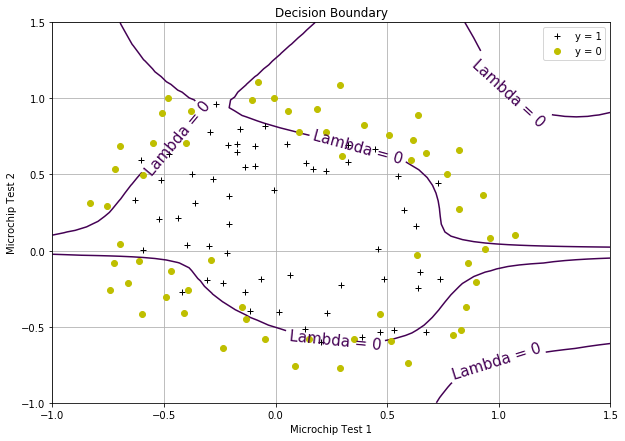

In [11]:
plotData()

xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))

for i in range(len(xvals)):
    for j in range(len(yvals)):
        myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
        zvals[i][j] = np.matmul(myfeaturesij, mapW) + mapB
        
zvals = zvals.transpose()
u, v = np.meshgrid( xvals, yvals )
mycontour = plt.contour( xvals, yvals, zvals, [0])
#Kind of a hacky way to display a text on top of the decision boundary
myfmt = { 0:'Lambda = 0'}
plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
plt.title("Decision Boundary")